# Multi model comparison

In [1]:
import numpy as np
from fmskill.model import ModelResult, ModelResultCollection
from fmskill.observation import PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

## Define observations

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [4]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr1 = ModelResult(fn, name='SW_1')

In [5]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu'
mr2 = ModelResult(fn, name='SW_2')

## Collection of model results

In [6]:
mrc = ModelResultCollection([mr1, mr2])
mrc.modelresults

{'SW_1': <fmskill.ModelResult>
 ../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu,
 'SW_2': <fmskill.ModelResult>
 ../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu}

In [7]:
mrc.add_observation(o1, item=0)
mrc.add_observation(o2, item=0)
mrc.add_observation(o3, item=0)

In [8]:
mrc.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

In [9]:
cc = mrc.extract()    # returns a collection of comparisons

In [10]:
cc.skill_df(model="SW_1").round(2)

,n,bias,rmse,mape,cc,si,r2
observation,,,,,,,
HKNA,385,-0.20,0.35,7.52,0.97,0.09,0.99
EPL,66,-0.08,0.22,8.26,0.97,0.07,0.99
c2,113,-0.00,0.35,11.57,0.97,0.12,0.99


In [11]:
cc.skill_df(model="SW_1", end='2017-10-28')

,n,bias,rmse,mape,cc,si,r2
observation,,,,,,,
HKNA,281,-0.098125,0.203006,6.550260,0.969014,0.067014,0.994140
EPL,48,-0.110532,0.227094,9.766226,0.932614,0.087529,0.989960
c2,72,-0.188193,0.313787,12.579264,0.478554,0.122423,0.976593


In [12]:
cc.skill_df(observation="c2")

,n,bias,rmse,mape,cc,si,r2
model,,,,,,,
SW_2,113,0.081431,0.430268,13.172449,0.974335,0.142327,0.978991
SW_1,113,-0.001210,0.351796,11.567400,0.974335,0.118511,0.985955


<AxesSubplot:title={'center':'EPL'}, ylabel='Significant wave height [m]'>

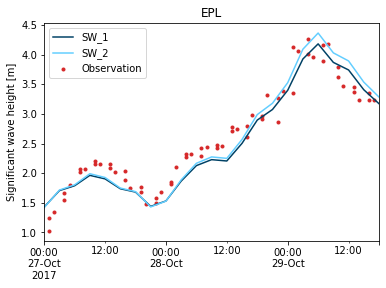

In [13]:
cc['EPL'].plot_timeseries()

## MultiModel Comparer (single point, alternative approach)

In [14]:
ds_model_11 = mr1._extract_point_dfsu(o1, item=0)
ds_model_21 = mr2._extract_point_dfsu(o1, item=0)

In [15]:
from fmskill.compare import PointComparer

In [16]:
mmc = PointComparer(o1, [ds_model_11, ds_model_21])
mmc

<PointComparer>
Observation: HKNA

In [17]:
mmc.df.head()

,Observation,SW_1,SW_2
2017-10-27 00:10:00.000000,1.46484,1.591661,1.593077
2017-10-27 00:19:59.999994,1.50391,1.603593,1.605845
2017-10-27 00:29:59.999999,1.44531,1.615526,1.618612
2017-10-27 00:39:59.999993,1.44531,1.627458,1.631380
2017-10-27 00:49:59.999998,1.52344,1.639390,1.644147


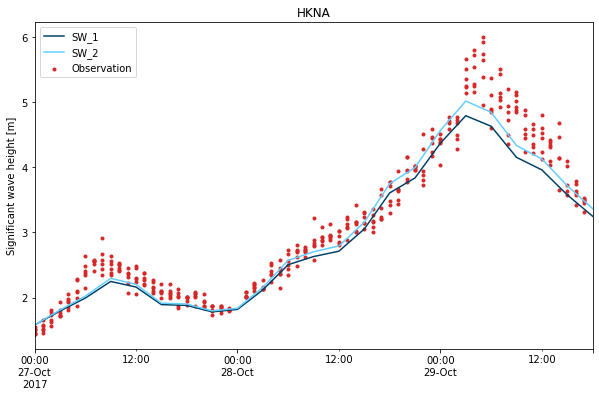

In [18]:
mmc.plot_timeseries(figsize=(10,6));

In [19]:
mmc.plot_timeseries(backend='plotly', width=800);